In [2]:
import pandas as pd
import numpy as np

# Df using Dict

In [15]:
a = {'name':['Naren','sankar'],'age':[24,24]}
type(a)

dict

In [17]:
df= pd.DataFrame(data=a)
df

,age,name
0,24,Naren
1,24,sankar


In [18]:
df.head(1)

,age,name
0,24,Naren


In [19]:
df.tail(1)

,age,name
1,24,sankar


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
age     2 non-null int64
name    2 non-null object
dtypes: int64(1), object(1)
memory usage: 112.0+ bytes


In [21]:
df.index

RangeIndex(start=0, stop=2, step=1)

In [22]:
df.describe()

,age
count,2.0
mean,24.0
std,0.0
min,24.0
25%,24.0
50%,24.0
75%,24.0
max,24.0


In [24]:
df.columns

Index(['age', 'name'], dtype='object')

AttributeError: 'DataFrame' object has no attribute 'rows'

In [27]:
df['name'].describe()

count         2
unique        2
top       Naren
freq          1
Name: name, dtype: object

# SQL

In [29]:
from sqlalchemy import create_engine

In [30]:
engine = create_engine('sqlite:///')

In [32]:
df.to_sql("Naren.db",con=engine)

In [34]:
df = pd.read_sql('Naren.db',con=engine)

In [37]:
df.describe()

,index,age
count,2.000000,2.0
mean,0.500000,24.0
std,0.707107,0.0
min,0.000000,24.0
25%,0.250000,24.0
50%,0.500000,24.0
75%,0.750000,24.0
max,1.000000,24.0


In [40]:
df = pd.read_csv('C:/Users/nthambat/Downloads/titanic/train.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [43]:
type(df['Age'])

pandas.core.series.Series

In [44]:
type(df.Age)

pandas.core.series.Series

In [45]:
df['Name'].describe()

count                                         891
unique                                        891
top       Andersson, Master. Sigvard Harald Elias
freq                                            1
Name: Name, dtype: object

In [46]:
#find target variable and see how the data is either balanced or imbalanced dataset 
#by using upward sampling and downward sampling will make dataset as balance dataset
df.Survived.value_counts()
#it is imbalance data set

0    549
1    342
Name: Survived, dtype: int64

In [47]:
import matplotlib.pyplot as plt

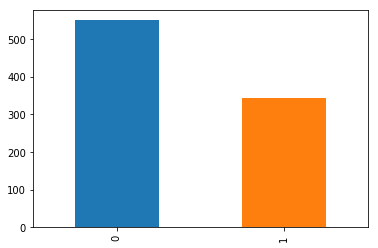

In [50]:
df.Survived.value_counts().plot(kind='bar')

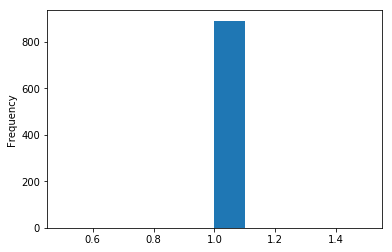

In [52]:
df.Name.value_counts().plot(kind='hist')

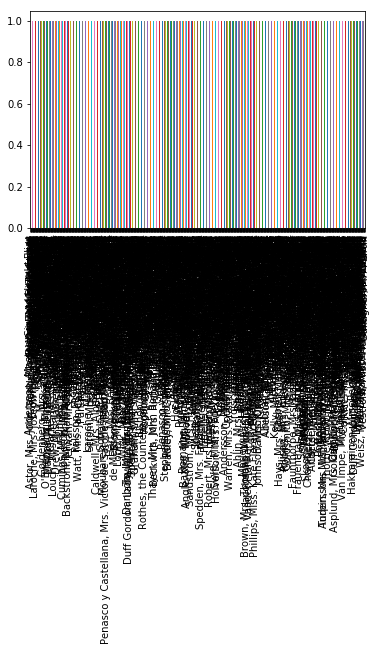

In [53]:
df.Name.value_counts().plot(kind='bar')

In [ ]:
#without using value_counts for plot, if we use df['sex'].plot will get error
#df['sex'].vaalue_counts().plot  it will work

In [54]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# Find the Childrens who were died? (<12years)

In [60]:
df[(df['Age']<=12)& df['Survived']==0][['Name','Age']]

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0
5,"Moran, Mr. James",NaN
6,"McCarthy, Mr. Timothy J",54.0
7,"Palsson, Master. Gosta Leonard",2.0
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0
9,"Nasser, Mrs. Nicholas (Adele Achem)",14.0


# Find the old persons who were survived?(>=50)

In [62]:
df[(df['Age']>=50) & (df['Survived']==1)][['Name','Age']]

,Name,Age
11,"Bonnell, Miss. Elizabeth",58.0
15,"Hewlett, Mrs. (Mary D Kingcome)",55.0
195,"Lurette, Miss. Elise",58.0
259,"Parrish, Mrs. (Lutie Davis)",50.0
268,"Graham, Mrs. William Thompson (Edith Junkins)",58.0
275,"Andrews, Miss. Kornelia Theodosia",63.0
299,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",50.0
366,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",60.0
449,"Peuchen, Major. Arthur Godfrey",52.0
458,"Toomey, Miss. Ellen",50.0


In [67]:
df[(df['Age']>=50) & (df['Survived']==1)]['Age'].value_counts()

50.0    5
54.0    3
52.0    3
58.0    3
51.0    2
56.0    2
62.0    2
60.0    2
63.0    2
80.0    1
53.0    1
55.0    1
Name: Age, dtype: int64

In [68]:
df[(df['Age']>=50) & (df['Survived']==1)]['Age'].count()

27

# Find the min and max Fare?

In [70]:
df['Fare'].max()

512.3292

In [71]:
df['Fare'].min()

0.0

# Howmany male persons were in class-1?

In [73]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [76]:
df[(df['Sex']=='male')&(df['Pclass']==1)]['Name'].count()

122

# Find the ratio of survival between male and female?

In [80]:
df[(df['Survived']==0)&(df['Sex']=='male')]['Name'].count()

468

In [81]:
df[(df['Survived']==1)&(df['Sex']=='male')]['Name'].count()

109

In [82]:
df[(df['Survived']==0)&(df['Sex']=='female')]['Name'].count()

81

In [83]:
df[(df['Survived']==1)&(df['Sex']=='female')]['Name'].count()

233

In [84]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [87]:
a =df.groupby('Survived')
a

In [86]:
a['Sex'].value_counts()

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

In [88]:
a['Sex'].value_counts(normalize=True)

Survived  Sex   
0         male      0.852459
          female    0.147541
1         female    0.681287
          male      0.318713
Name: Sex, dtype: float64

In [89]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


# Pclass vs Survived

In [90]:
b=df.groupby('Survived')

In [91]:
b['Pclass'].value_counts()

Survived  Pclass
0         3         372
          2          97
          1          80
1         1         136
          3         119
          2          87
Name: Pclass, dtype: int64

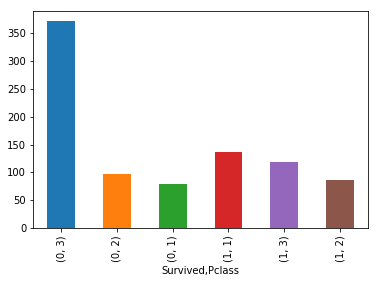

In [92]:
b['Pclass'].value_counts().plot(kind='bar')

# 'Laleff, Mr. Kristo', was he died?

In [98]:
df[df['Name']== 'Laleff, Mr. Kristo']['Survived']

878    0
Name: Survived, dtype: int64

In [100]:
df.groupby("Survived")

# make different age grps: children,teenagers,middle age,olders

In [102]:
children= df[df['Age']<=12]

In [103]:
teenagers= df[(df['Age']>12) & (df['Age']<18)]

In [104]:
middle= df[(df['Age']>18) & (df['Age']<40)]

In [105]:
olders =df[(df['Age']>40)]

# Get details of 'Fynney, Mr. Joseph J'

In [106]:
df[df['Name']=='Fynney, Mr. Joseph J']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0,NaN,S


# find more than 1 sibling?

In [111]:
df[(df['SibSp']== 1)]['Name'].count()

209

# find sum of fare?

In [112]:
df['Fare'].sum()

28693.9493

In [113]:
len(df)

891

# Bonus tip: cls wise Fare?

In [115]:
v=df.groupby('Pclass')

In [117]:
v['Fare'].sum()

Pclass
1    18177.4125
2     3801.8417
3     6714.6951
Name: Fare, dtype: float64